# **Importing Important Libraries**

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib 
import os 
import PIL
from PIL import Image

# **Loading and Preprocessing Data**

In [16]:
data_dir = pathlib.Path("Custom-Dataset-4")
# print(len(list(data_dir.glob("*/*"))))


In [ ]:
trash = list(data_dir.glob('Can/*'))
PIL.Image.open(str(trash[0]))

In [17]:
batch_size = 32
image_height = 224
image_width = 224

In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  # validation_split=0.1,
  # subset="training",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 22543 files belonging to 4 classes.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 21000 files belonging to 3 classes.
Using 2100 files for validation.


In [ ]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 2)
val_ds = val_ds.skip(val_batches // 2)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

In [19]:
#Classes as inferred
class_names = train_ds.class_names
print(class_names)

['Can', 'General', 'Paper', 'Plastic']


In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

# **Configure Dataset Performance**

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
# test_ds= test_ds.prefetch(buffer_size=AUTOTUNE)

# **Data Augmentation**

In [8]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

## Load The Pre-trained Model - **RESNET50**

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
tf.keras.utils.disable_interactive_logging()


In [34]:
model = tf.keras.models.load_model("Models/ResNet50-STBv1.0_10")


In [11]:
for layer in model.layers:
  print(layer.trainable)

True
True
True
True
True
True
True
True


In [26]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=[tf.keras.metrics.Precision()])

In [23]:
# Create a function to convert labels to one-hot encoding
num_classes = 4
def to_one_hot(x, y):
    num_classes = 3
    y_one_hot = tf.one_hot(y, num_classes)
    return x, y_one_hot

In [24]:
train_ds = train_ds.map(to_one_hot)

In [16]:
val_ds = val_ds.map(to_one_hot)

In [25]:
test_ds = test_ds.map(to_one_hot)

In [27]:
# # Define the checkpoint filepath
# checkpoint_filepath = "/content/drive/MyDrive/Models/ResNet50.h5"

# Create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath = 'Tuner/ResNet50-STBv1.1/{epoch:02d}.h5',
    save_weights_only=False,
    save_best_only=False,
    save_freq='epoch',
    verbose=1)

# Train the model and save the history and model at each epoch
# history = model.fit(train_ds, validation_data=test_ds, epochs=25, verbose=1, callbacks=[checkpoint_callback])
history = model.fit(
    train_ds, 
validation_data=test_ds,
callbacks=[checkpoint_callback],
epochs=25)

Epoch 1/25


705/705 [==============================] - ETA: 0s - loss: 52413.3906 - precision_1: 0.2752
Epoch 1: saving model to Tuner/ResNet50-STBv1.1/01.h5
705/705 [==============================] - 2127s 3s/step - loss: 52413.3906 - precision_1: 0.2752 - val_loss: 1297798.6250 - val_precision_1: 0.2576
Epoch 2/25
705/705 [==============================] - ETA: 0s - loss: nan - precision_1: 0.2707
Epoch 2: saving model to Tuner/ResNet50-STBv1.1/02.h5
705/705 [==============================] - 2119s 3s/step - loss: nan - precision_1: 0.2707 - val_loss: nan - val_precision_1: 0.0000e+00
Epoch 3/25
705/705 [==============================] - ETA: 0s - loss: nan - precision_1: 0.0000e+00
Epoch 3: saving model to Tuner/ResNet50-STBv1.1/03.h5
705/705 [==============================] - 2046s 3s/step - loss: nan - precision_1: 0.0000e+00 - val_loss: nan - val_precision_1: 0.0000e+00
Epoch 4/25
705/705 [==============================] - ETA: 0s - loss: nan - precision_1: 0.0000e+00
Epoch 4: saving model t

In [29]:
history.history

{'loss': [52413.390625,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'precision_1': [0.27518871426582336,
  0.27070313692092896,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_loss': [1297798.625,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'val_precision_1': [0.2575962245464325,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

## Results

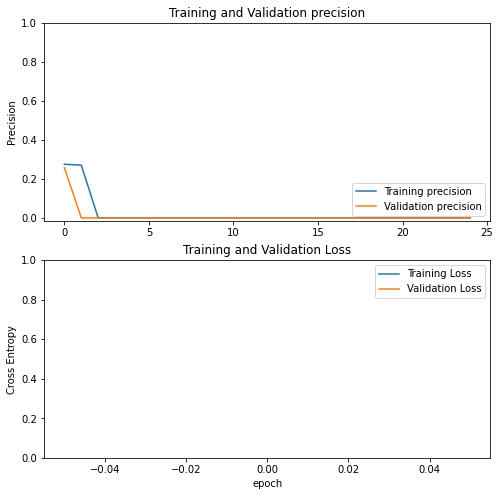

In [31]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

acc = history.history['precision_1']
val_acc = history.history['val_precision_1']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training precision')
plt.plot(val_acc, label='Validation precision')
plt.legend(loc='lower right')
plt.ylabel('Precision')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation precision')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [32]:
# model.save("Models/ResNet50-STBv1.0_8")
model.save("Models/ResNet-4-50-STBv1.0")

INFO:tensorflow:Assets written to: Models/ResNet-4-50-STBv1.0/assets


INFO:tensorflow:Assets written to: Models/ResNet-4-50-STBv1.0/assets


In [ ]:
# Load the best model (u should have saved it from the checkpoints above)
# model_ = tf.keras.models.load_model("/content/drive/MyDrive/Tuner/resnet50_stb_v1_0_6.08.h5")  
model_ = tf.keras.models.load_model("Tuner/resnet50_stb_v1_0_11.16.h5")  
# /home/ai-05/Desktop/sdp/Tuner

In [ ]:
# model_.save("/content/drive/My Drive/Models/ResNet50-STBv1.0_6")
model_.save("Models/resnet50_stb_v1_0_11")

## Evaluation and Predictions

In [22]:
# Evaluating on a new dataset from the internet
# paper and plastic from  https://www.kaggle.com/datasets/arthurcen/waste-images-from-sushi-restaurant
# can from https://universe.roboflow.com/dataset-t7hz7/cans-fdboa/dataset/1
# test_dir = pathlib.Path("Dataset-testing (from internet)")
test_dir = pathlib.Path("WasteImagesDataset-4")

batch_size = 32
image_height = 224
image_width = 224

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)


Found 2962 files belonging to 4 classes.


In [ ]:
model = tf.keras.models.load_model("Models/ResNet50-STBv1.0_6")

In [72]:
model.evaluate(test_ds)
# print('Test accuracy :', accuracy)

10/82 [==>...........................] - ETA: 1:28 - loss: 0.5281 - accuracy: 0.7906

In [ ]:
num_trials = 15
from kerastuner import HyperParameters
tuner_hps_summary = tuner.get_best_hyperparameters(num_trials=num_trials)

In [ ]:
summary_dict = {}
for i,a in enumerate(tuner_hps_summary):
  print(f"Best trial {i}:")

  trial_dict = {}
  for hp_name, hp_value in a.values.items():
      # print(f"{hp_value}")
      trial_dict[hp_name] = hp_value
  summary_dict[i] = trial_dict

In [ ]:
import pandas as pd

# Create a pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(summary_dict, orient='index')

# Write the DataFrame to an excel file
df.to_excel('/content/drive/My Drive/Models/output-3_1.xlsx', na_rep='')

In [ ]:
print("Best hyperparameters:")

for i,trial in enumerate(tuner_hps_summary):
  print(f"Trial {i}")
  for hp_name, hp_value in trial.values.items():
      print(f"- {hp_name}: {hp_value}")

## Convert to TfLite

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('/content/drive/My Drive/Models/ResNet50-STBv1.0_6_Lite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.summary()